# Mapa de voxeles

En este ejercicio implementaremos un mapa de voxeles para representar un espacio tridimensional. Como entrada, el programa leerá los obstáculos que se encuentran en un archivo separado por comas.


In [8]:
# Importamos los paquetes requeridos

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 
plt.rcParams['figure.figsize'] = 16, 16

El archivo de obstáculos contiene una serie de objetos en $2.5D$ que representan edificios en una ciudad.

Cada renglón del archivo especifica:

row = [posX, posY, posZ, halfSizeX, halfSizeY, halfSizeZ]


In [14]:
# Este archivo contiene la información acerca del mapa.
filename = 'data_reduced.csv'
data = np.loadtxt(filename, delimiter=',', dtype=np.float64, skiprows=2)
print(data)

[[-270.2389    -99.23154    80.          5.          5.         80.      ]
 [-260.2389    -99.23153    80.          5.          5.         80.      ]
 [-250.2389    -99.23155    80.00001     5.          5.         80.00001 ]
 ...
 [ 252.053     368.9957      3.065603    1.407089    1.407104    3.16009 ]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In this exercise you'll finish the implementation of `create_grid` such that a 3D grid is returned where cells containing a voxel are set to `True`. You'll then plot the result!

In [10]:
def create_voxmap(data, voxel_size=5):
    """
    Retorna un mapa de voxeles a partir de la información contenida en el archivo separado por comas.
    
    El argumento `voxel_size` establece la resolucion del mapa de voxeles.
    """
    
    # obtener coordenadas maximas y mínimas (norte)
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # obtener coordenadas maximas y mínimas (este)
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    # altitud máxima
    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # dadas las coordenamas máximas y mínimas podemos establecer el tamaño de mapa
    north_size = int(np.ceil(north_max - north_min)) // voxel_size
    east_size = int(np.ceil(east_max - east_min)) // voxel_size
    alt_size = int(alt_max) // voxel_size

    # Crear mapa vacío
    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)

    for i in range(data.shape[0]):
        # Insertar en cada voxel ocupado el valor True
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        obstacle = [
            int(north - d_north - north_min) // voxel_size,
            int(north + d_north - north_min) // voxel_size,
            int(east - d_east - east_min) // voxel_size,
            int(east + d_east - east_min) // voxel_size,
        ]

        height = int(alt + d_alt) // voxel_size
        voxmap[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3], 0:height] = True

    return voxmap

Contruir el mapa a partir de los datos

In [11]:
voxmap = create_voxmap(data, 10)
print(voxmap.shape)

(60, 50, 19)


/home/irving/miniconda3/envs/tuto_planning/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Graficar el mapa de voxeles.

/home/irving/miniconda3/envs/tuto_planning/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


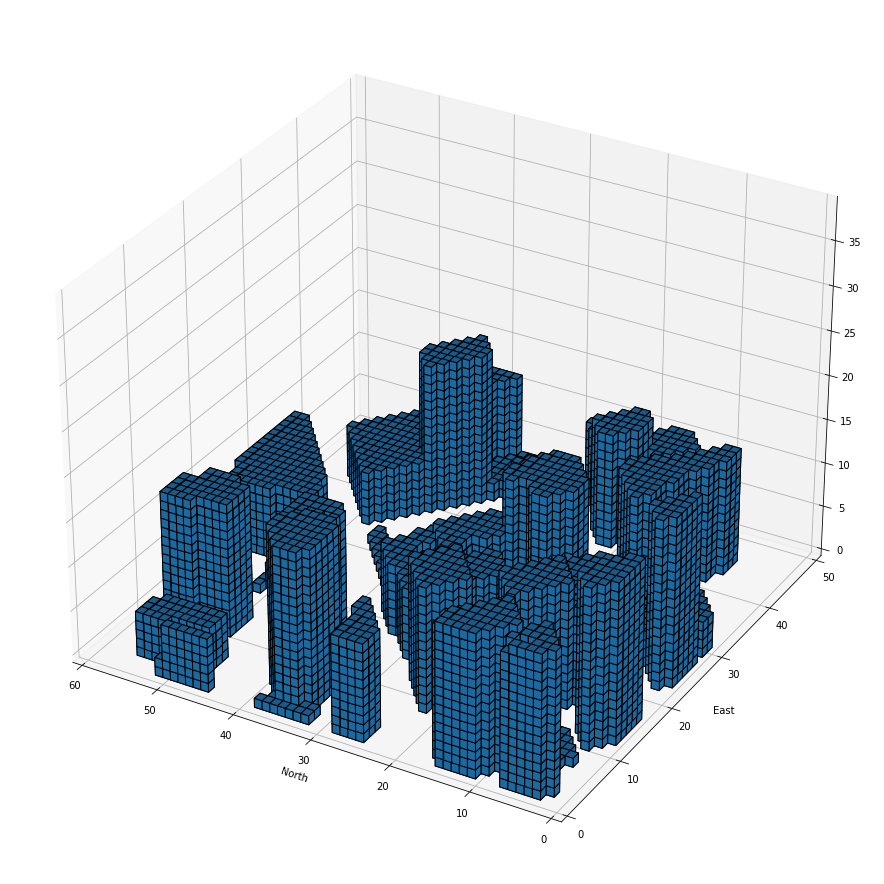

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
# add a bit to z-axis height for visualization
ax.set_zlim(0, voxmap.shape[2]+20)

plt.xlabel('North')
plt.ylabel('East')

plt.show()